In [1]:
using Distributions

using PyPlot
using LaTeXStrings
PyPlot.matplotlib[:rc]("text", usetex=true) # allow tex rendering

In [2]:
?BetaBinomial

search: BetaBinomial



```
BetaBinomial(n,α,β)
```

A *Beta-binomial distribution* is the compound distribution of the [`Binomial`](@ref) distribution where the probability of success `p` is distributed according to the [`Beta`](@ref). It has three parameters: `n`, the number of trials and two shape parameters `α`, `β`

$$
P(X = k) = {n \choose k} B(k + \alpha, n - k + \beta) / B(\alpha, \beta),  \quad \text{ for } k = 0,1,2, \ldots, n.
$$

```julia
BetaBinomial(n, α, β)      # BetaBinomial distribution with n trials and shape parameters α, β

params(d)       # Get the parameters, i.e. (n, α, β)
ntrials(d)      # Get the number of trials, i.e. n
```

External links:

  * [Beta-binomial distribution on Wikipedia](https://en.wikipedia.org/wiki/Beta-binomial_distribution)


In [3]:
function create_job_search_model(;
        n=50,        # wage grid size
        w_min=10.0,  # lowest wage
        w_max=60.0,  # highest wage
        a=200,       # wage distribution parameter
        b=100,       # wage distribution parameter
        β=0.96,      # discount factor
        c=10.0       # unemployment compensation
    )
    w_vals = collect(LinRange(w_min, w_max, n+1))
    ϕ = pdf(BetaBinomial(n, a, b))
    return (; n, w_vals, ϕ, β, c)
end

create_job_search_model (generic function with 1 method)

In [4]:
model = create_job_search_model()

(n = 50, w_vals = [10.0, 11.0, 12.0, 12.999999999999998, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0  …  50.99999999999999, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 57.99999999999999, 59.0, 60.0], ϕ = [1.1791637357224694e-21, 7.913850575319274e-20, 2.6332268350101137e-18, 5.789516415479376e-17, 9.458523308234368e-16, 1.2242590720614904e-14, 1.3071516133990144e-13, 1.1836186037811116e-12, 9.274110204450374e-12, 6.384446552094514e-11  …  0.010598963589205658, 0.005068155208330153, 0.0021325686770979047, 0.0007777657203566439, 0.00024098391843431559, 6.170679349541527e-5, 1.2542756620427359e-5, 1.8983216208610164e-6, 1.902540965744981e-7, 9.474654009410618e-9], β = 0.96, c = 10.0)

In [5]:
typeof(model)

NamedTuple{(:n, :w_vals, :ϕ, :β, :c), Tuple{Int64, Vector{Float64}, Vector{Float64}, Float64, Float64}}

In [6]:
(; n, w_vals, ϕ, β, c) = model

(n = 50, w_vals = [10.0, 11.0, 12.0, 12.999999999999998, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0  …  50.99999999999999, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 57.99999999999999, 59.0, 60.0], ϕ = [1.1791637357224694e-21, 7.913850575319274e-20, 2.6332268350101137e-18, 5.789516415479376e-17, 9.458523308234368e-16, 1.2242590720614904e-14, 1.3071516133990144e-13, 1.1836186037811116e-12, 9.274110204450374e-12, 6.384446552094514e-11  …  0.010598963589205658, 0.005068155208330153, 0.0021325686770979047, 0.0007777657203566439, 0.00024098391843431559, 6.170679349541527e-5, 1.2542756620427359e-5, 1.8983216208610164e-6, 1.902540965744981e-7, 9.474654009410618e-9], β = 0.96, c = 10.0)

In [7]:
(; n, w_vals, ϕ, β, c) = model;

In [8]:
size(w_vals)

(51,)

In [9]:
w_vals

51-element Vector{Float64}:
 10.0
 11.0
 12.0
 12.999999999999998
 14.0
 15.0
 16.0
 17.0
 18.0
 19.0
 20.0
 21.0
 22.0
  ⋮
 49.00000000000001
 50.0
 50.99999999999999
 52.0
 53.0
 54.0
 55.0
 56.0
 57.0
 57.99999999999999
 59.0
 60.0

In [10]:
size(ϕ)

(51,)

In [11]:
ϕ

51-element Vector{Float64}:
 1.1791637357224694e-21
 7.913850575319274e-20
 2.6332268350101137e-18
 5.789516415479376e-17
 9.458523308234368e-16
 1.2242590720614904e-14
 1.3071516133990144e-13
 1.1836186037811116e-12
 9.274110204450374e-12
 6.384446552094514e-11
 3.9077373217785535e-10
 2.1468275672291524e-9
 1.06680217697672e-8
 ⋮
 0.03303121916328912
 0.019736153450067906
 0.010598963589205658
 0.005068155208330153
 0.0021325686770979047
 0.0007777657203566439
 0.00024098391843431559
 6.170679349541527e-5
 1.2542756620427359e-5
 1.8983216208610164e-6
 1.902540965744981e-7
 9.474654009410618e-9

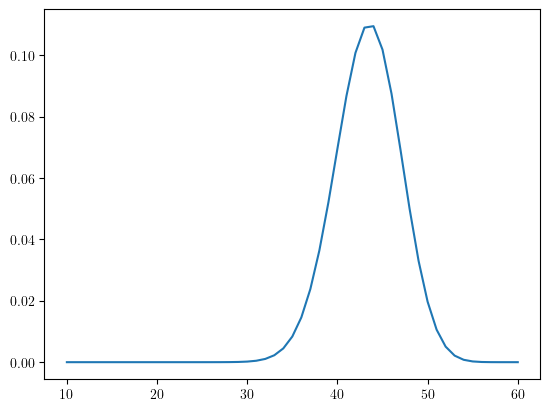

In [12]:
plt.plot(w_vals, ϕ);

In [13]:
sum(ϕ)

0.9999999999999913

In [14]:
sum(ϕ) ^ 1000

0.9999999999913403

In [15]:
ϕ_norm = ϕ / sum(ϕ)

51-element Vector{Float64}:
 1.1791637357224796e-21
 7.913850575319343e-20
 2.6332268350101364e-18
 5.789516415479427e-17
 9.458523308234451e-16
 1.224259072061501e-14
 1.3071516133990257e-13
 1.183618603781122e-12
 9.274110204450455e-12
 6.384446552094569e-11
 3.907737321778587e-10
 2.146827567229171e-9
 1.0668021769767293e-8
 ⋮
 0.0330312191632894
 0.019736153450068076
 0.01059896358920575
 0.005068155208330197
 0.0021325686770979234
 0.0007777657203566507
 0.00024098391843431767
 6.17067934954158e-5
 1.2542756620427467e-5
 1.8983216208610329e-6
 1.9025409657449973e-7
 9.474654009410701e-9

In [16]:
sum(ϕ_norm)

1.0

$$
v_{1}\left(w_{1}\right)	=\max\left\{ w_{1}+\beta w_{1},c+\beta\sum_{w^{\prime}\in W}v_{2}\left(w^{\prime}\right)\varphi\left(w^{\prime}\right)\right\} 
	=\max\left\{ w_{1}+\beta w_{1},h_{1}\right\} \\
v_{2}\left(w\right)=\max\left\{ c,w\right\} \\
$$

In [17]:
max.(c, w_vals)

51-element Vector{Float64}:
 10.0
 11.0
 12.0
 12.999999999999998
 14.0
 15.0
 16.0
 17.0
 18.0
 19.0
 20.0
 21.0
 22.0
  ⋮
 49.00000000000001
 50.0
 50.99999999999999
 52.0
 53.0
 54.0
 55.0
 56.0
 57.0
 57.99999999999999
 59.0
 60.0

In [18]:
max.(c, w_vals)'

1×51 adjoint(::Vector{Float64}) with eltype Float64:
 10.0  11.0  12.0  13.0  14.0  15.0  …  55.0  56.0  57.0  58.0  59.0  60.0

In [19]:
max.(c, w_vals)'ϕ

43.33333333333285

In [20]:
" Computes lifetime value at t=1 given current wage w_1 = w. "
function v_1(w, model)
    (; n, w_vals, ϕ, β, c) = model
    h_1 = c + β * max.(c, w_vals)'ϕ
    return max(w + β * w, h_1)
end

v_1

$$
w_{1}^{*}:=\frac{h_{1}}{1+\beta}
$$

In [21]:
" Computes reservation wage at t=1. "
function res_wage(model)
    (; n, w_vals, ϕ, β, c) = model
    h_1 = c + β * max.(c, w_vals)'ϕ
    return h_1 / (1 + β)
end

res_wage

In [22]:
w_star = res_wage(model)

w_star

26.326530612244664

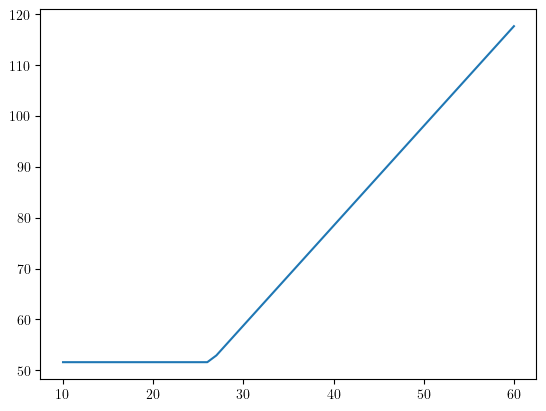

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9ee3e2f2e0>

In [23]:
v = [v_1(w, model) for w in model.w_vals]

plt.plot(w_vals, v)

In [24]:
# == Plots == #

default_model = create_job_search_model()

" Plot the distribution of wages. "
function fig_dist(model=default_model, fs=14)
    fig, ax = plt.subplots()
    ax.plot(model.w_vals, model.ϕ, "-o", alpha=0.5, label="wage distribution")
    ax.legend(loc="upper left", fontsize=fs)
end


" Plot two-period value function and res wage. "
function fig_v1(model=default_model; savefig=false, 
                  figname="./figures/iid_job_search_0.pdf", fs=18)

    (; n, w_vals, ϕ, β, c) = model

    v = [v_1(w, model) for w in model.w_vals]
    w_star = res_wage(model)
    continuation_val = c + β * max.(c, w_vals)'ϕ
    min_w, max_w = minimum(w_vals), maximum(w_vals)

    fig, ax = plt.subplots(figsize=(9, 5.5))
    ax.set_ylim(0, 120)
    ax.set_xlim(min_w, max_w)
    ax.vlines((w_star,), (0,), (continuation_val,), lw=0.5)
    ax.set_yticks((0, 50, 100))
    ax.set_yticklabels((0, 50, 100), fontsize=12)
    ax.set_xticks((min_w, w_star, max_w))
    ax.set_xticklabels((min_w, L"$w^*_1$", max_w), fontsize=12)
    ax.plot(w_vals, w_vals + β * w_vals, "-", alpha=0.8, lw=3, 
            label=L"$w_1 + \beta w_1$")
    ax.plot(w_vals, fill(continuation_val, n+1), lw=3, alpha=0.8, 
            label=L"$c + \beta \sum_{w'} \max\{c, w'\} \varphi(w')$" )
    ax.plot(w_vals, v, "k--", ms=2, alpha=1.0, lw=2, label=L"$v_1(w_1)$")
    ax.legend(frameon=false, fontsize=fs, loc="upper left")
    if savefig
        fig.savefig(figname)
    end
end

fig_v1

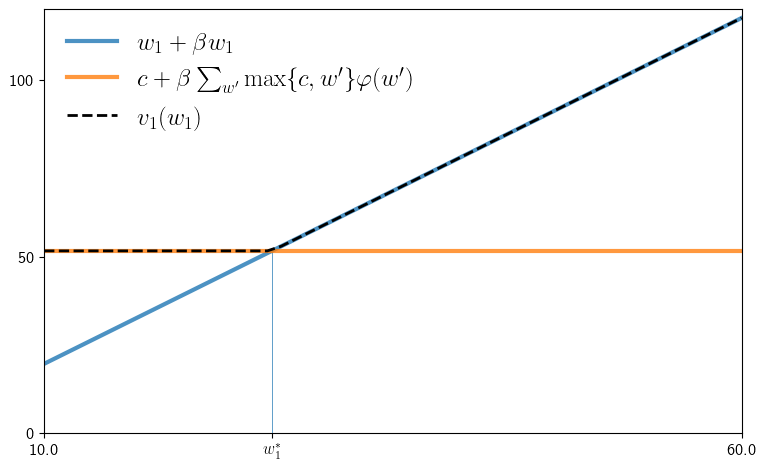

In [25]:
fig_v1()

## Three Period Job Search Model

$$
v_{2}\left(w_{2}\right)=\max\left\{ c,w_{2}\right\}  \\
v_{t}\left(w_{t}\right)=\max\left\{ w_{t}+\sum_{i=1}^{T-t}\beta^{i}w_{t},c+\beta\sum_{w^{\prime}\in W}v_{t+1}\left(w^{\prime}\right)\varphi\left(w^{\prime}\right)\right\} ,\quad t=0,1
$$

In [26]:
# " Computes lifetime value at t=1 given current wage w_1 = w. "
# function v_1(w, model)
#     (; n, w_vals, ϕ, β, c) = model
#     h_1 = c + β * max.(c, w_vals)'ϕ
#     return max(w + β * w, h_1)
# end

In [27]:
" Computes lifetime value at t=1 given current wage w_t = w and v_{t+1}."
function v_t(w, t, v_next, model)
    (; n, w_vals, ϕ, β, c) = model
    h_t = c + β * v_next'ϕ
    z_t = w * sum(β .^ collect(0:1:3-t-1))
    return max.(z_t, h_t)
end

v_t

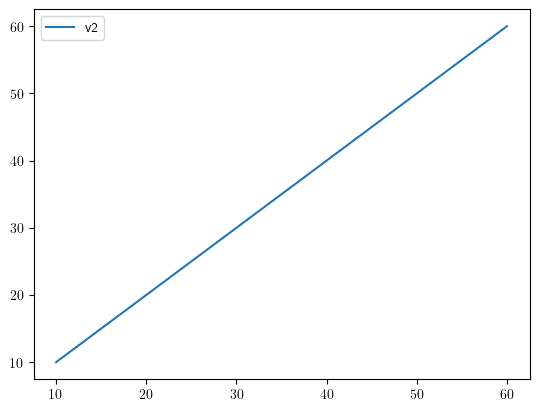

PyObject <matplotlib.legend.Legend object at 0x7f9ee5f323e0>

In [28]:
v2 = max.(c, w_vals)

plt.plot(w_vals, v2, label="v2")
plt.legend()

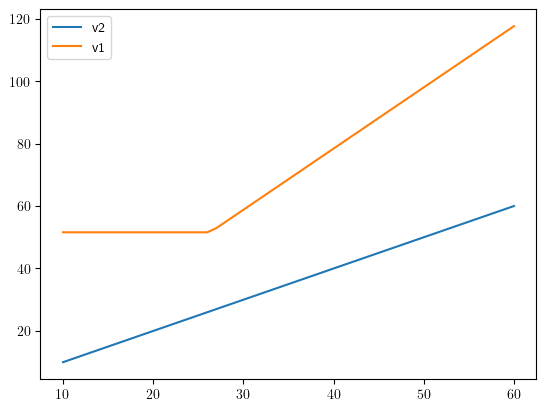

PyObject <matplotlib.legend.Legend object at 0x7f9ee5fa9b10>

In [29]:
t = 1
v1 = [v_t(w, t, v2, model) for w in w_vals]

plt.plot(w_vals, v2, label="v2")
plt.plot(w_vals, v1, label="v1")
plt.legend()

In [30]:
maximum(abs.(v1 - v))

1.4210854715202004e-14

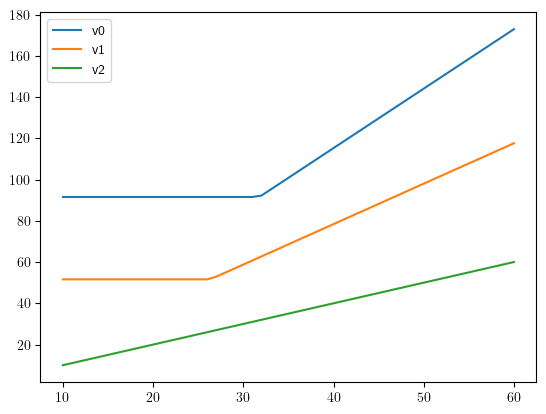

PyObject <matplotlib.legend.Legend object at 0x7f9ee3c43400>

In [31]:
t = 0
v0 = [v_t(w, t, v1, model) for w in w_vals]

plt.plot(w_vals, v0, label="v0")
plt.plot(w_vals, v1, label="v1")
plt.plot(w_vals, v2, label="v2")
plt.legend()

Use array to circumvent the need of defining mulptile variable $v_{t}$.

In [32]:
N = 3
v_arr = Array{Float64}(undef, length(w_vals), N)

size(v_arr)

(51, 3)

In [33]:
# v2 = np.maximum(c, w_vals)
v_arr[:, 3] = max.(c, w_vals);

t = 1
v_arr[:, t+1] = [v_t(w, t, v_arr[:, t+1+1], model) for w in w_vals];

t = 0
v_arr[:, t+1] = [v_t(w, t, v_arr[:, t+1+1], model) for w in w_vals];

In [34]:
maximum(abs.(v_arr[:, 3] - v2))

0.0

In [35]:
maximum(abs.(v_arr[:, 2] - v1))

0.0

In [36]:
maximum(abs.(v_arr[:, 1] - v0))

0.0

# For loops

In [37]:
for i in 0:9
    print(i)
end

0123456789

In [38]:
for i in 0:1:9
    print(i)
end

0123456789

In [39]:
for i in 9:-1:0
    print(i)
end

9876543210

## Q. How to compute N period Job Search Model?

Where to put `N`? => `Model.N`

Prepare numpy matrix `v` (of what size)?  
compute `v[N-1]`  
$t \leftarrow N-2$  
while $t \geq 0$ do  
   compute `v[t]` using `v[t+1]`  
   $t \leftarrow t-1$  
end  

In [40]:
function backwards_induction(...)

    # unpack model parameters

    # initialization

    # compute v[N-1]

    # for loop, compute v[N-2], v[N-3], ..., v[0]

    return ...
end

LoadError: syntax: invalid identifier name "..."